# Week 4 Individual Coding Assignment

This assignment is a continuation of my week 3 census exploration note book. In week three I analyzed Census data from the [2024 Living Atlas Dataset](https://github.com/cgiamarino9/PubAff405_S25/blob/main/Weeks/Week03%20Census%20Data/data/LACountyTracts24.zip) provided during lecture to explore its relevance to my research on small business distribution in Los Angeles County. Specifically, I focused on two key variables: **Daytime Population: Workers** and tract **Population Density**, which I calculated by dividing the total population by the land area in square miles to standardize across geographic units.   </br>

This week, I made advancements by incorporating Plotly to create interactive visualizations. This allows for a clearer and more engaging exploration of population patters across census tracts.


##### The following code cell imports the pandas and geopandas libraries. 

In [1]:
#mporting libraries
import pandas as PD
import geopandas as gpd

##### The following code cell allows me to access the data I will be exploring.

In [2]:
# reads file and saves data as 'rawData'
rawData=gpd.read_file('data/LACountyTracts24.zip')

#### rawData was saved. 
Using **.head()** allows me to preview the first few rows of the dataset and gain a quick understanding of its structure and contents.

In [3]:
rawData.head()

,ID,NAME,STATE_NAME,ST_ABBREV,AREA,TOTPOP_CY,HHPOP_CY,GQPOP_CY,POPDENS_CY,TOTHH_CY,...,NHSPWHT__1,NHSPBLK__1,NHSPAI_CY_,NHSPASN__1,NHSPPI_CY_,NHSPOTH__1,NHSPMLT__1,HSGRAD_LES,BACHDEG_PL,geometry
0,06037262302,060372623.02,California,CA,1.182838,2782,2765,17,2352.0,1141,...,79.295471,1.042416,0.000000,6.506111,0.000000,1.006470,5.140187,0.824043,83.131362,"POLYGON ((-13187629.788 4038588.873, -13187642..."
1,06037206201,060372062.01,California,CA,0.077543,2863,2202,661,36941.9,1262,...,20.852253,16.590988,1.012924,28.815927,0.419141,0.838282,4.680405,9.677419,45.822994,"POLYGON ((-13162511.881 4035572.196, -13162582..."
2,06037128102,060371281.02,California,CA,0.250507,4755,4521,234,18982.0,1479,...,18.401682,5.005258,0.042061,5.615142,0.147213,0.672976,1.451104,25.774135,17.941712,"POLYGON ((-13184678.486 4053894.2, -13184921.4..."
3,06037131701,060371317.01,California,CA,0.254699,4591,4575,16,18025.1,1741,...,23.175779,5.968199,0.174254,21.367894,0.043563,0.588107,3.724679,17.841079,34.002999,"POLYGON ((-13197317.144 4055820.492, -13197556..."
4,06037232800,060372328.00,California,CA,0.164729,3927,3858,69,23843.4,968,...,0.993125,12.554113,0.254647,0.611154,0.000000,0.891266,1.120448,43.775763,10.634790,"POLYGON ((-13166681.241 4028231.101, -13166681..."


##### I reviewed the [Esri data dictionary](https://www.arcgis.com/home/item.html?id=b0b3b31e531e406185f2de4fff596060) to better understand the available variables and determine which ones are most relevant to my research. Based on this review, I decided to focus on the following:
1. FIP
2. Area Square Miles
3. Total Population
4. Household Population
5. Total Daytime Population
6. **Daytime Population: Workers**
7. Daytime Population: Residents
8. Households in Low Income Tier
9. Households in Middle Income Tier
10. Households in Upper Income Tier
11. Geometry

In [4]:
# I will be storing the following columns to further evaluate the data.
fields_to_eval = ['ID', 'AREA', 'TOTPOP_CY',
                      'HHPOP_CY', 'DPOP_CY', 
                      'DPOPWRK_CY', 'DPOPRES_CY',
                      'LOTRHH_CY', 'MDTRHH_CY',
                      'UPTRHH_CY', 'geometry']

# The fields I am interested in further studying are saved in a new dataframe named 'cleanedData'
cleanedData = rawData[fields_to_eval]

##### I renamed the columns to make them easier to read and interpret during analysis.

In [5]:
# Udpated column names so it's easier to evaluate the dataframe. 
cleanedData.columns = [ 'FIPS', 'Area Square Miles', 'Total Population',
                        'Household Population', 'Total Daytime Population',
                        'Daytime Population: Workers', 'Daytime Population: Residents',
                        'Households in Low Income Tier', 'Households in Middle Income Tier',
                        'Households in Upper Income Tier', 'geometry']

# Used .head() to ensure the data was titles correctly.
cleanedData.head()

,FIPS,Area Square Miles,Total Population,Household Population,Total Daytime Population,Daytime Population: Workers,Daytime Population: Residents,Households in Low Income Tier,Households in Middle Income Tier,Households in Upper Income Tier,geometry
0,06037262302,1.182838,2782,2765,3505,1939,1566,160,311,670,"POLYGON ((-13187629.788 4038588.873, -13187642..."
1,06037206201,0.077543,2863,2202,3794,2138,1656,624,528,110,"POLYGON ((-13162511.881 4035572.196, -13162582..."
2,06037128102,0.250507,4755,4521,3894,1603,2291,439,1000,40,"POLYGON ((-13184678.486 4053894.2, -13184921.4..."
3,06037131701,0.254699,4591,4575,2919,584,2335,376,1020,345,"POLYGON ((-13197317.144 4055820.492, -13197556..."
4,06037232800,0.164729,3927,3858,2580,251,2329,430,468,70,"POLYGON ((-13166681.241 4028231.101, -13166681..."


##### I created a copy of the DataFrame in order to add a new column calculating population density per square mile. 


In [6]:
# copied the dataframe to make further modifications. 
subsetData = cleanedData.copy()

# Created a new column for population density
subsetData['Population Density'] = subsetData['Total Population'] / subsetData['Area Square Miles']

# used .head() to ensure the population density column was calculated correctly
subsetData.head()

,FIPS,Area Square Miles,Total Population,Household Population,Total Daytime Population,Daytime Population: Workers,Daytime Population: Residents,Households in Low Income Tier,Households in Middle Income Tier,Households in Upper Income Tier,geometry,Population Density
0,06037262302,1.182838,2782,2765,3505,1939,1566,160,311,670,"POLYGON ((-13187629.788 4038588.873, -13187642...",2351.971364
1,06037206201,0.077543,2863,2202,3794,2138,1656,624,528,110,"POLYGON ((-13162511.881 4035572.196, -13162582...",36921.455345
2,06037128102,0.250507,4755,4521,3894,1603,2291,439,1000,40,"POLYGON ((-13184678.486 4053894.2, -13184921.4...",18981.527266
3,06037131701,0.254699,4591,4575,2919,584,2335,376,1020,345,"POLYGON ((-13197317.144 4055820.492, -13197556...",18025.189901
4,06037232800,0.164729,3927,3858,2580,251,2329,430,468,70,"POLYGON ((-13166681.241 4028231.101, -13166681...",23839.172584


#### Mapping Population Density


Based on the skewed distribution of population density values, I used the **NaturalBreaks** to more accurately group similar areas and visualize the data on a map of Los Angeles County.

<Axes: >

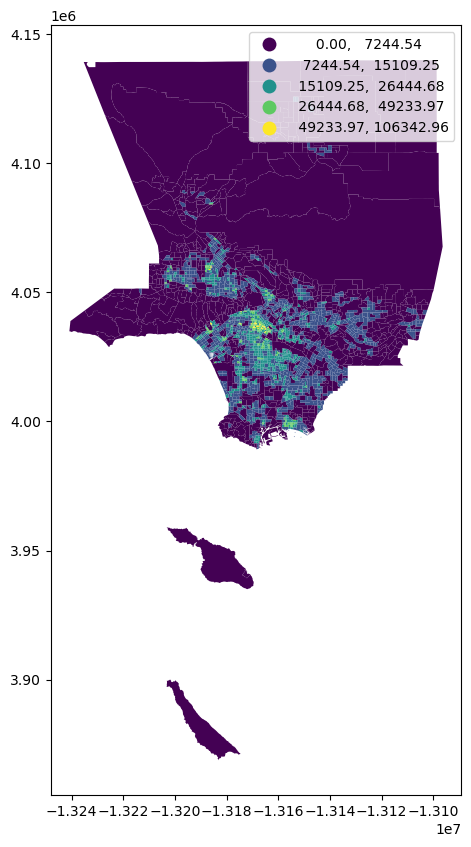

In [9]:
subsetData.plot(figsize=(12,10),
                column = 'Population Density',
                legend = True,
                scheme = 'NaturalBreaks')

### Daytime Population: Workers


#### Mapping the **Daytime Population: Workers field**

By plotting Daytime Population: Workers, I can visually identify where the majority of workers are concentrated within the county. This insight will be valuable for comparing these workforce hubs with the locations of local small business vendors doing business with the County.

<Axes: >

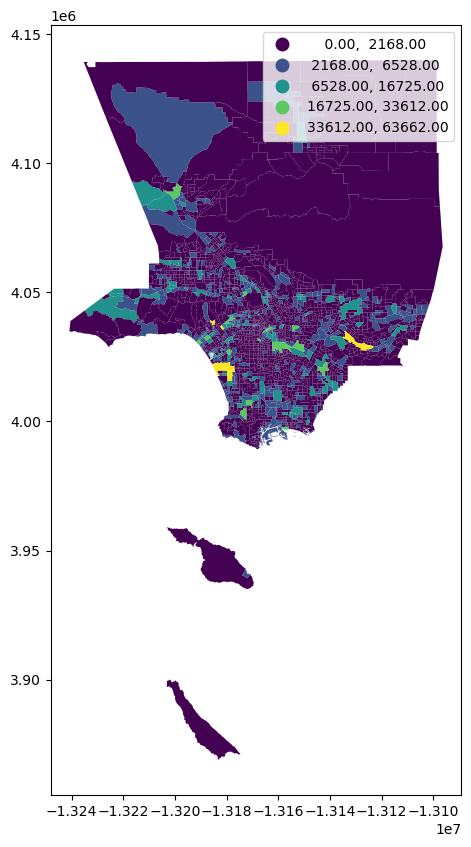

In [12]:
subsetData.plot(figsize=(12,10),
                column = 'Daytime Population: Workers',
                legend = True,
                scheme = 'NaturalBreaks')

### Import matplotlib, Contextilly, and Plotly

In [52]:
import matplotlib.pyplot as plt
import contextily as ctx
import plotly.express as px

#### Like we did in class, I created a side by side map comparing population density and daytime population of workers to explore how residential and working populations vary across Los Angeles County census tracts.


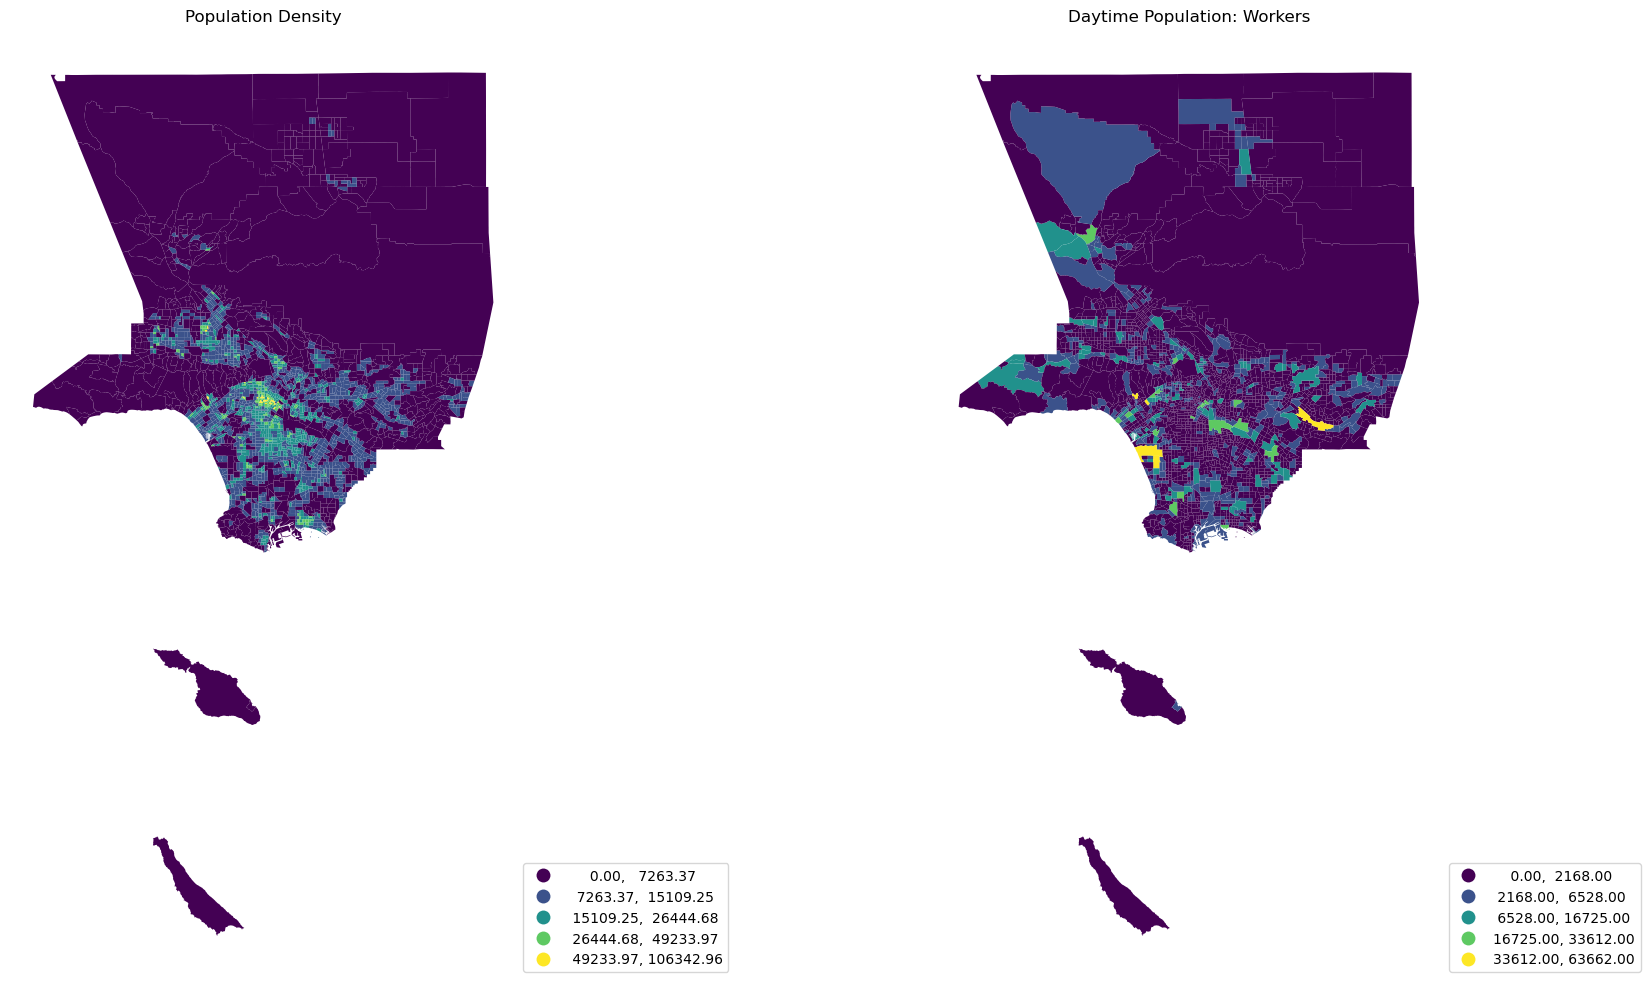

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# First map (left): Population Density
subsetData.plot(column='Population Density',
                legend=True,
                scheme='NaturalBreaks',
                ax=ax[0],
                legend_kwds={'loc': 'lower left', 'bbox_to_anchor': (1, 0)})
ax[0].set_title('Population Density')
ax[0].axis('off')

# Second map (right): Daytime Population: Workers
subsetData.plot(column='Daytime Population: Workers',
                legend=True,
                scheme='NaturalBreaks',
                ax=ax[1],
                legend_kwds={'loc': 'lower left', 'bbox_to_anchor': (1, 0)})
ax[1].set_title('Daytime Population: Workers')
ax[1].axis('off')

plt.tight_layout()
plt.show()


#### This chart uses **Plotly** to highlight the **10 census tracts** in Los Angeles County with the **highest daytime worker populations**, helping identify areas with strong daytime activity that may support or attract small business development.

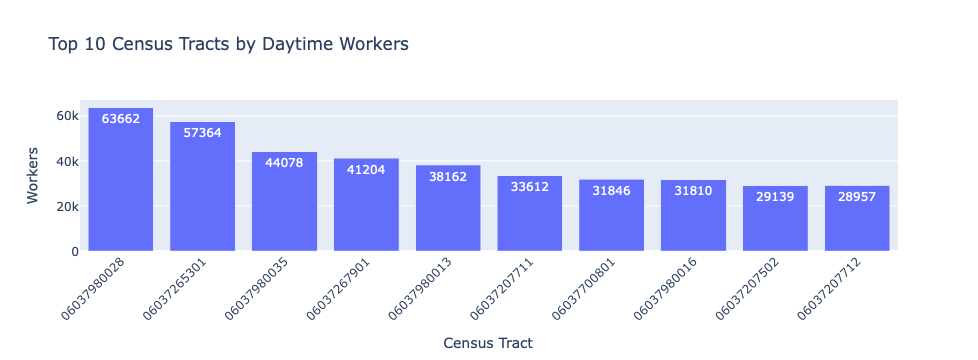

In [59]:
import plotly.express as px

top10 = subsetData.nlargest(10, 'Daytime Population: Workers')

fig = px.bar(top10,
             x='FIPS', 
             y='Daytime Population: Workers', 
             title='Top 10 Census Tracts by Daytime Workers',
             labels={'FIPS': 'Census Tract', 'Daytime Population: Workers': 'Workers'},
             text='Daytime Population: Workers')

fig.update_layout(xaxis_tickangle=-45)
fig.show()

#### Similar to the previous chart, this bar graph highlights the top 10 census tracts in Los Angeles County with the highest daytime worker population. This time however, I displayed the bars horizontally for easier comparison of values.

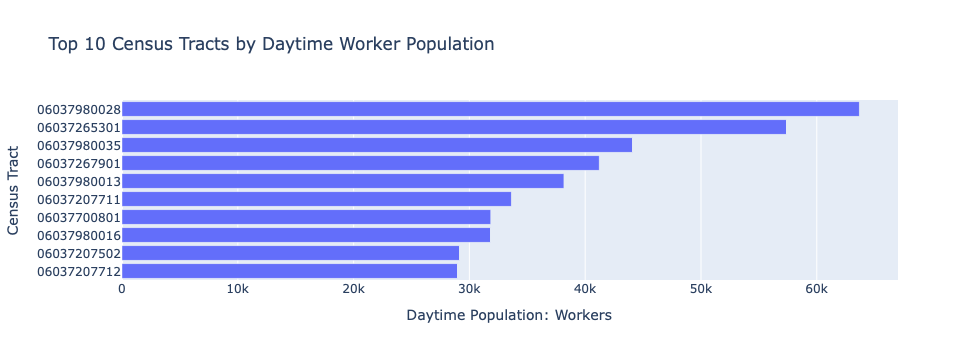

In [60]:
# Sort and get top 10 by daytime workers
top10 = subsetData.sort_values(by='Daytime Population: Workers', ascending=False).head(10)

fig = px.bar(top10,
             x='Daytime Population: Workers',
             y='FIPS',  
             orientation='h', #makes the orientation horizontal
             title='Top 10 Census Tracts by Daytime Worker Population')

fig.update_layout(xaxis_title='Daytime Population: Workers',
                  yaxis_title='Census Tract',
                  yaxis=dict(autorange="reversed"))  # Puts highest on top

fig.show()

#### This scatter plot compares total population and daytime worker population across census tracts in Los Angeles County, with the size of each point representing the tract’s land area.

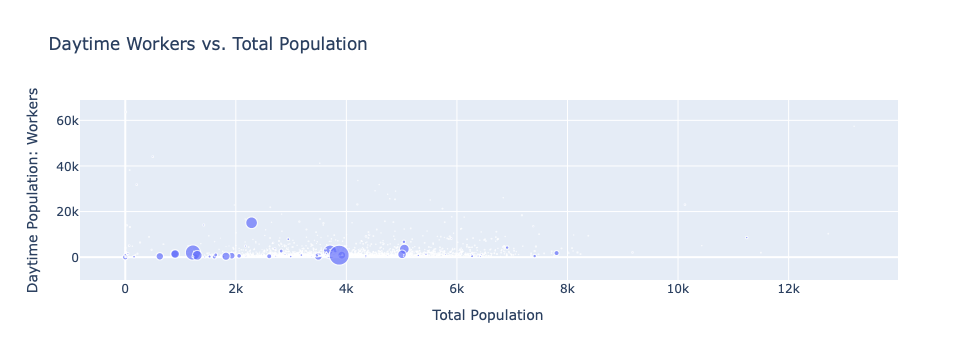

In [73]:
fig = px.scatter(subsetData,
                 x='Total Population',
                 y='Daytime Population: Workers',
                 size='Area Square Miles',
                 title='Daytime Workers vs. Total Population',
                 labels={
                     'Total Population': 'Total Population',
                     'Daytime Population: Workers': 'Daytime Population: Workers',
                     'Area Square Miles': 'Area Square Miles'
                 },
                 hover_data=['FIPS'])

fig.show()


#### This scatter plot compares total population and daytime workers by census tract, with bubble size representing population density and color indicating the daytime resident population.

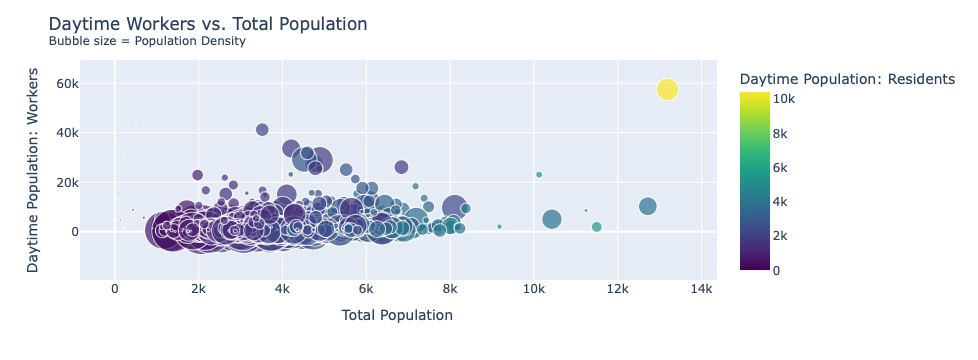

In [71]:
fig = px.scatter(subsetData,
                 x='Total Population',
                 y='Daytime Population: Workers',
                 size='Population Density',
                 color='Daytime Population: Residents',
                 color_continuous_scale='Viridis',
                 hover_name='FIPS',  
                 size_max=50)

fig.update_layout(title='Daytime Workers vs. Total Population<br><sup>Bubble size = Population Density</sup>',
                  xaxis_title='Total Population',
                  yaxis_title='Daytime Population: Workers')

fig.show()
